In [1]:
# 移动窗口函数
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from pandas import DataFrame, Series
from scipy.stats import percentileofscore

%matplotlib inline

In [2]:
close_px_all = pd.read_csv('../data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


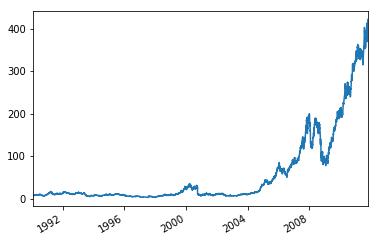

In [3]:
close_px.AAPL.plot()

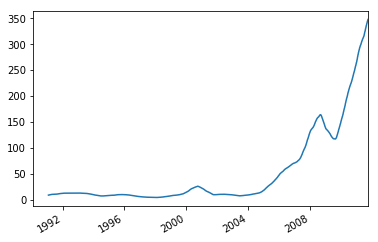

In [4]:
close_px.AAPL.rolling(window=250).mean().plot() # rolling_xxx系列函数已经被淘汰

In [5]:
close_px.AAPL.rolling(window=250, min_periods=10).std()[:15] # min_periods代表最少取10天的值

1990-02-01         NaN
1990-02-02         NaN
1990-02-05         NaN
1990-02-06         NaN
1990-02-07         NaN
1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
1990-02-20    0.133388
1990-02-21    0.128228
1990-02-22    0.136539
Name: AAPL, dtype: float64

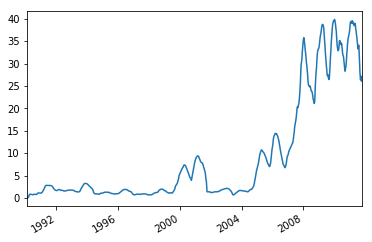

In [6]:
close_px.AAPL.rolling(window=250, min_periods=10).std().plot()

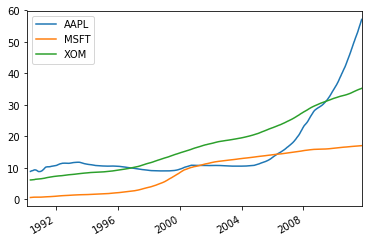

In [7]:
close_px.expanding(min_periods=60).mean().plot() # 对DataFrame取60天平均线

In [8]:
# 指数加权函数

Text(0.5,1,'Exponentially-weighted MA')

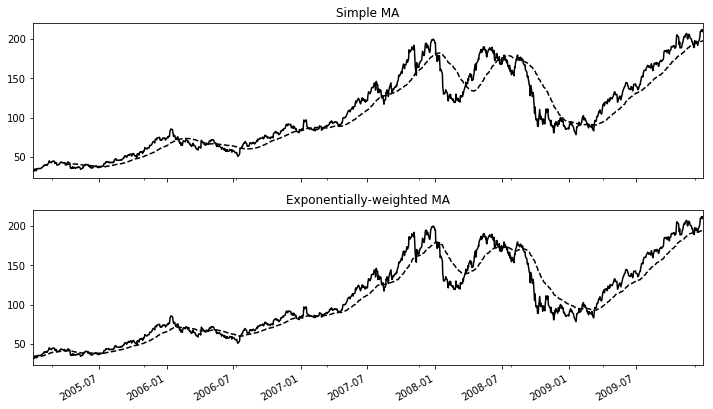

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window=60).mean()
ewma60 = aapl_px.ewm(span=60).mean() # ewm = 指数加权
# ewma60 = pd.ewma(aapl_px, span=60)
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [10]:
# 二元移动窗口函数

In [11]:
spx_px = close_px_all ['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(window=125,min_periods=100).corr(spx_rets)
corr[95:105]

1990-06-19         NaN
1990-06-20         NaN
1990-06-21         NaN
1990-06-22         NaN
1990-06-25         NaN
1990-06-26    0.443796
1990-06-27    0.448514
1990-06-28    0.454206
1990-06-29    0.448460
1990-07-02    0.442510
dtype: float64

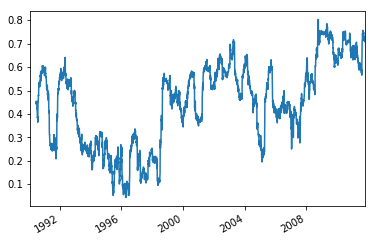

In [12]:
corr.plot()

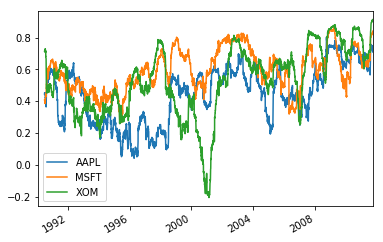

In [13]:
corr = returns.rolling(window=125, min_periods=100).corr(spx_rets)
corr.plot()

In [14]:
# 用户定义的移动窗口函数

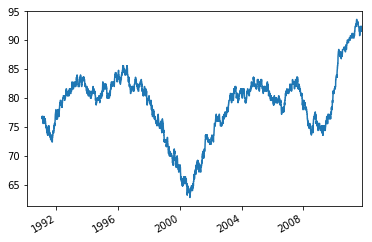

In [15]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
# result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent) # 回报率的2%分位等级
result = returns.AAPL.rolling(window=250).apply(score_at_2percent) # apply里可以通过args和kwargs传递更多参数
result.plot()